In [129]:
import warnings
warnings.simplefilter('ignore')
from sklearn import tree
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [131]:
# Create df without NaNs
deaths = pd.read_csv('Data/Opioid_Related_Deaths_2012-2018.csv')
deaths_nonan = deaths.dropna(subset=['Age', 'Sex','Race','DeathCity'])
deaths_nonan.count()

ID                      4494
Date                    4494
Age                     4494
Sex                     4494
Race                    4494
ResidenceCity           4341
ResidenceCounty         3813
ResidenceState          3218
DeathCity               4494
DeathCounty             3507
Location                4479
LocationifOther          534
DescriptionofInjury     3819
InjuryPlace             4444
InjuryCity              3048
InjuryCounty            2153
InjuryState             1288
COD                     4494
Heroin                  4494
Synthetic Opioids       4494
Prescription Opioids    4494
DeathCityGeo            4494
DeathCityLat            4494
DeathCityLong           4494
Drug_Category           4494
dtype: int64

In [133]:
# Clean up data with only columns needed
deaths_forML = deaths_nonan[['Age', 'Sex', 'Race', 'DeathCity', 'Drug_Category'
       ]]
deaths_forML.head()

,Age,Sex,Race,DeathCity,Drug_Category
1,30.0,Female,White,DANBURY,Heroin
2,23.0,Male,White,GREENWICH,Heroin
3,22.0,Male,Asian,GREENWICH,Synthetic Opioids
4,23.0,Male,White,BRISTOL,Heroin
5,21.0,Female,White,WEST HARTFORD,Heroin


In [138]:
# Reshape data
X = deaths_forML[["Age", "Sex", "Race","DeathCity"]]
y = deaths_forML["Drug_Category"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4494, 4) (4494, 1)


In [139]:
# Reformat data to numeric



# y = pd.get_dummies(deaths_forML['Drug_Category'])
X = pd.get_dummies(X)

# data = deaths_forML.values

# X = data[:, 0:4]
# y = data[:, 4]



In [101]:
# from sklearn.preprocessing import LabelEncoder

# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)

In [102]:
# for label, original_class in zip(encoded_y, y):
#     print('Original Class: ' + str(original_class))
#     print('Encoded Label: ' + str(label))
#     print('-' * 12)

In [103]:
# from keras.utils import to_categorical

# # Step 2: One-hot encoding
# one_hot_y = to_categorical(encoded_y)
# one_hot_y

In [140]:
from sklearn.model_selection import train_test_split

# X = pd.get_dummies(X)
# y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Age,Sex_Female,Sex_Male,Sex_Unknown,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_Unknown,Race_White,...,DeathCity_VERNON,DeathCity_WALLINGFORD,DeathCity_WATERBURY,DeathCity_WATERTOWN,DeathCity_WEST HARTFORD,DeathCity_WEST HAVEN,DeathCity_WETHERSFIELD,DeathCity_WILLIMANTIC,DeathCity_WINDSOR,DeathCity_WINDSOR LOCKS
3594,60.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1413,46.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1150,49.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
105,36.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3834,48.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [106]:
# feature_names = data.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [141]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.452846975088968

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200) # nj
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.46352313167259784

In [143]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6450876088373935, 'Age'),
 (0.014405754369675365, 'DeathCity_BROAD BROOK'),
 (0.013052207621035001, 'Race_Hispanic, Black'),
 (0.01245691556516434, 'DeathCity_BARKHAMSTED'),
 (0.011864779904476753, 'DeathCity_BOLTON'),
 (0.011837111588059078, 'Race_Other'),
 (0.01144107202524021, 'DeathCity_BLOOMFIELD'),
 (0.011110490871794172, 'Sex_Male'),
 (0.011103541620662436, 'DeathCity_CLINTON'),
 (0.010471109962756688, 'Sex_Female'),
 (0.010321023610883193, 'Race_Asian, Other'),
 (0.00986404319329238, 'Race_Black'),
 (0.00914169073033459, 'DeathCity_BERLIN'),
 (0.008917589717204218, 'Race_Unknown'),
 (0.00844976836557096, 'DeathCity_BOZRAH'),
 (0.008165473959579764, 'Race_White'),
 (0.007887490728067839, 'DeathCity_BRISTOL'),
 (0.007820688865362638, 'DeathCity_BETHANY'),
 (0.007804868203100486, 'DeathCity_ANSONIA'),
 (0.007659803476253132, 'DeathCity_BRIDGEWATER'),
 (0.007377375382430428, 'DeathCity_06340'),
 (0.007261020928415395, 'DeathCity_CANTON'),
 (0.007237871472014757, 'DeathCity_AMSTON'),
 (0.00722937256531403, 'DeathCity_BEACON FALLS'),
 (0.0071029769790204025, 'DeathCity_CHAPLIN'),
 (0.006646155687612295, 'DeathCity_BETHEL'),
 (0.006430686697164931, 'DeathCity_COVENTRY'),
 (0.006376827310223373, 'DeathCity_CORNWALL BRIDGE'),
 (0.006198691397688899, 'DeathCity_CENTRAL VILLAGE'),
 (0.005963861656960312, 'Race_Hispanic, White'),
 (0.00547978938955899, 'DeathCity_CANTERBURY'),
 (0.00540803607308352, 'DeathCity_CHESHIRE'),
 (0.005396852936695047, 'DeathCity_BANTAM'),
 (0.005147607181226688, 'Race_Native American, Other'),
 (0.00505797666036218, 'DeathCity_BETHLEHEM'),
 (0.004869340056672172, 'DeathCity_BALTIC'),
 (0.004253856811293397, 'DeathCity_BRANFORD'),
 (0.004237910646301283, 'DeathCity_ANDOVER'),
 (0.00423236840790208, 'DeathCity_BURLINGTON'),
 (0.003948370267604456, 'DeathCity_CHESTER'),
 (0.0038760640403964785, 'DeathCity_ASHFORD'),
 (0.0037353118770080225, 'DeathCity_COLUMBIA'),
 (0.003655707327547545, 'DeathCity_COS COB'),
 (0.003613132880569009, 'DeathCity_DANBURY'),
 (0.0035555936347920177, 'DeathCity_COLCHESTER'),
 (0.0034436437896688183, 'DeathCity_CROMWELL'),
 (0.003443388795517569, 'DeathCity_AVON'),
 (0.0034157051056007332, 'DeathCity_BRIDGEPORT'),
 (0.003319452046954564, 'DeathCity_BROOKFIELD'),
 (0.0031137819688691255, 'DeathCity_BROOKLYN'),
 (0.0029335883538966845, 'Race_Asian Indian'),
 (0.002514150603253956, 'Race_Chinese'),
 (0.0023533794053659826, 'Race_Hawaiian'),
 (0.0020722043156755406, 'DeathCity_BAKERSVILLE'),
 (0.00023491413143270307, 'Sex_Unknown')]

In [144]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb = xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)


0.5578291814946619

In [145]:
sorted(zip(xgb.feature_importances_, feature_names), reverse=True)

[(0.07654272, 'Sex_Male'),
 (0.050103355, 'DeathCity_BARKHAMSTED'),
 (0.045126807, 'DeathCity_ANSONIA'),
 (0.038777277, 'DeathCity_BROAD BROOK'),
 (0.03872366, 'Race_Hispanic, Black'),
 (0.03445757, 'DeathCity_06340'),
 (0.030918261, 'Race_Hispanic, White'),
 (0.029108504, 'DeathCity_DANBURY'),
 (0.027994782, 'DeathCity_BLOOMFIELD'),
 (0.025250094, 'DeathCity_ANDOVER'),
 (0.025104737, 'Race_Asian, Other'),
 (0.02509941, 'DeathCity_COLCHESTER'),
 (0.02470582, 'Race_Unknown'),
 (0.02401996, 'DeathCity_BEACON FALLS'),
 (0.022296716, 'DeathCity_CHESTER'),
 (0.02222953, 'DeathCity_CANTON'),
 (0.021522343, 'DeathCity_AMSTON'),
 (0.02131508, 'Age'),
 (0.020436283, 'DeathCity_COVENTRY'),
 (0.018449131, 'DeathCity_BANTAM'),
 (0.018040428, 'DeathCity_BETHLEHEM'),
 (0.017695932, 'DeathCity_BETHANY'),
 (0.017312381, 'DeathCity_BRISTOL'),
 (0.016683219, 'DeathCity_CLINTON'),
 (0.0159884, 'DeathCity_CORNWALL BRIDGE'),
 (0.015901862, 'Sex_Female'),
 (0.015862763, 'DeathCity_BOLTON'),
 (0.015757903, 'Race_Native American, Other'),
 (0.015467903, 'DeathCity_BURLINGTON'),
 (0.015330357, 'DeathCity_BRIDGEWATER'),
 (0.01507279, 'DeathCity_CHAPLIN'),
 (0.015055721, 'Race_White'),
 (0.014856879, 'DeathCity_BETHEL'),
 (0.013425637, 'DeathCity_BOZRAH'),
 (0.013076861, 'DeathCity_ASHFORD'),
 (0.012618673, 'DeathCity_BALTIC'),
 (0.012467052, 'DeathCity_COLUMBIA'),
 (0.011834606, 'DeathCity_BROOKLYN'),
 (0.0116438605, 'Race_Other'),
 (0.01143453, 'DeathCity_BAKERSVILLE'),
 (0.011273795, 'DeathCity_BRIDGEPORT'),
 (0.010776334, 'DeathCity_CANTERBURY'),
 (0.010246851, 'Race_Black'),
 (0.010120965, 'Race_Chinese'),
 (0.00880893, 'DeathCity_BRANFORD'),
 (0.0075782025, 'DeathCity_CHESHIRE'),
 (0.0074999398, 'Race_Asian Indian'),
 (0.0066039693, 'DeathCity_CROMWELL'),
 (0.0048634447, 'DeathCity_CENTRAL VILLAGE'),
 (0.0045177955, 'DeathCity_COS COB'),
 (0.0, 'Sex_Unknown'),
 (0.0, 'Race_Hawaiian'),
 (0.0, 'DeathCity_BROOKFIELD'),
 (0.0, 'DeathCity_BERLIN'),
 (0.0, 'DeathCity_AVON')]

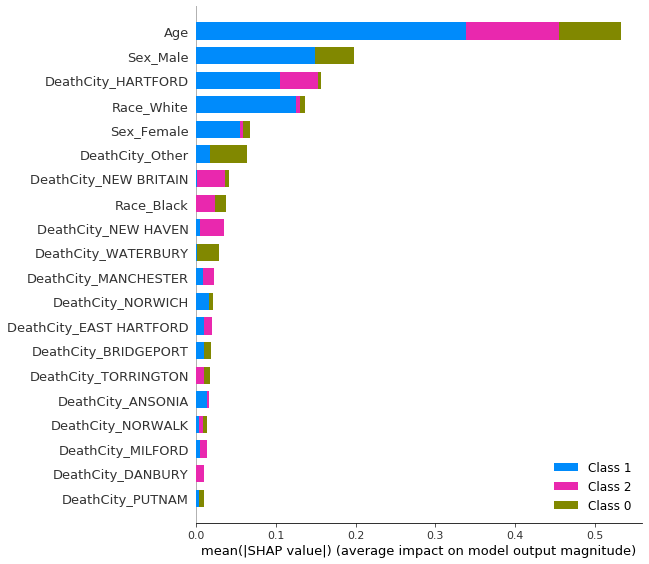

In [146]:
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,plot_type="bar")